# Simulating VAR(1) Process with Two Components

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR

# Simulate VAR(1) time series
np.random.seed(42)
L = 1000  # length of time series
C = 2     # number of variables

# Transition matrix for VAR(1) process
A = np.array([[0.7, 0.1],
              [0.3, 0.5]])

# Identity matrix for noise covariance
cov = np.eye(C)

# Generate random noise
noise = np.random.multivariate_normal(np.zeros(C), cov, L)

# Initialize the time series data
data = np.zeros((L, C))

# Simulate the VAR(1) process
for t in range(1, L):
    data[t] = A @ data[t-1] + noise[t]

# Create DataFrame
df = pd.DataFrame(data, columns=['Y1', 'Y2'])

# Display the first few rows
df.head()

,Y1,Y2
0,0.000000,0.000000
1,0.647689,1.523030
2,0.371532,0.721685
3,1.911453,1.239736
4,0.992517,1.735864


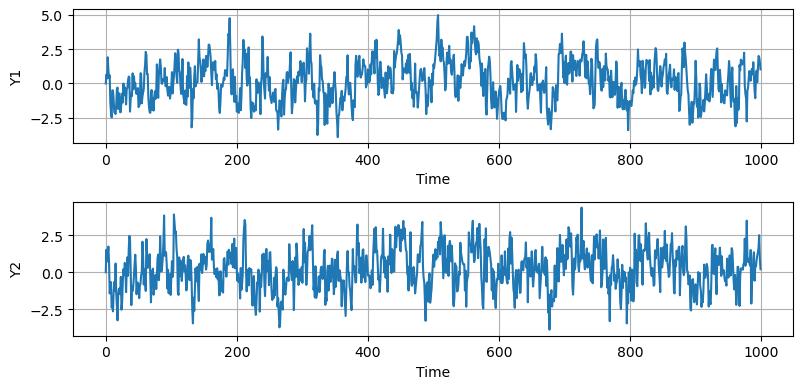

In [23]:

# Plot sample paths for Y1 and Y2 in two subplots
plt.figure(figsize=(8, 4))

# Subplot for Y1
plt.subplot(2, 1, 1)
plt.plot(df['Y1'], label='Y1')
plt.xlabel('Time')
plt.ylabel('Y1')
plt.grid(True)

# Subplot for Y2
plt.subplot(2, 1, 2)
plt.plot(df['Y2'], label='Y2')
plt.xlabel('Time')
plt.ylabel('Y2')
plt.grid(True)

plt.tight_layout()
plt.show()

### Scatter Plot of Y1 vs Y2

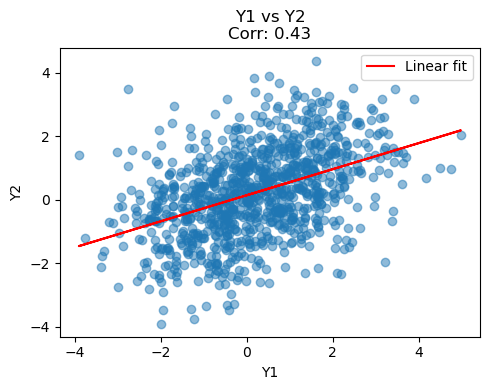

In [24]:
# Scatter plot between Y1 and Y2 with linear fit
plt.figure(figsize=(5, 4))

# Compute the Pearson correlation coefficient
corr_Y1_Y2 = df['Y1'].corr(df['Y2'])

# Scatter plot
plt.scatter(df['Y1'], df['Y2'], alpha=0.5)

# Compute linear fit
slope, intercept = np.polyfit(df['Y1'], df['Y2'], 1)
plt.plot(df['Y1'], slope * df['Y1'] + intercept, color='red', label='Linear fit')

# Add title and labels
plt.title(f'Y1 vs Y2\nCorr: {corr_Y1_Y2:.2f}')
plt.xlabel('Y1')
plt.ylabel('Y2')

plt.legend()
plt.tight_layout()
plt.show()

### Cross-Correlation Function

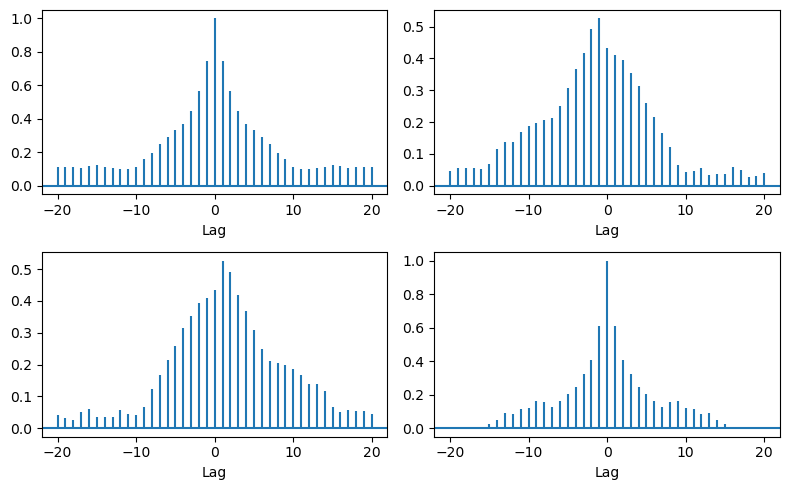

In [26]:
from scipy.stats import zscore

# Standardizing the series (z-scores)
df['Y1_z'] = zscore(df['Y1'])
df['Y2_z'] = zscore(df['Y2'])

# Create subplots for cross-correlation
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))
max_lags = 20  # Maximum number of lags

# Plot cross-correlations
axes[0, 0].xcorr(df['Y1_z'], df['Y1_z'], maxlags=max_lags)
axes[1, 1].xcorr(df['Y2_z'], df['Y2_z'], maxlags=max_lags)
axes[0, 1].xcorr(df['Y1_z'], df['Y2_z'], maxlags=max_lags)
axes[1, 0].xcorr(df['Y2_z'], df['Y1_z'], maxlags=max_lags)

for ax in axes.flat:
    ax.set_xlabel('Lag')

plt.tight_layout()
plt.show()